In [5]:
#!pip3 install beautifulsoup4
# !pip3 install requests
# !pip3 install TextBlob
# !pip3 install WordCloud

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
url = 'https://www.jobstreet.com.sg/en/companies/660729-peoples-association-pa/reviews?page={}'
def get_url(url):
    req = urllib.request.Request(url)
    return urllib.request.urlopen(req)

df = pd.DataFrame()
df['Source'] = ''
Reviews = []
Type = [] 
Rating = []

page = 1
while (page<5):
    res = requests.get(url.format(page))
    print(res.url)
    soup = BeautifulSoup(res.content,"html.parser")
    reviews = soup.find_all('div', class_='_38vs4lAyUXcKa9_jkSpHea')
    ratings = soup.find_all('div', class_='McWFQ2qtQ7eWurJgkcxWT')
    for reviews in reviews:
        Reviews.append(reviews.find('div', {'class' : '_2NfE_Vr9YcvPmkQKmZVNL0','id' :"good-review"}).text)
        Type.append('GR')
        Reviews.append(reviews.find('div', {'class' : '_2NfE_Vr9YcvPmkQKmZVNL0','id' :"challange-review"}).text)
        Type.append('CR')
    for ratings in ratings:
        Rating.append(ratings.find('span', {'class' : 'Tlh9F04dzRFo78gJPlhMM'}).text)
        Rating.append(ratings.find('span', {'class' : 'Tlh9F04dzRFo78gJPlhMM'}).text)
    #     print(reviews.find('span', {'class' : '_2s16Kji2BFASw8VCHpxUzG'}).text)
    #     print(reviews.find('span', {'class' : 'Tlh9F04dzRFo78gJPlhMM'}).text)
    page+=1
    
df['Reviews'] = Reviews
df['Type'] = Type
df['Rating'] = Rating
df.count()

https://www.jobstreet.com.sg/en/companies/660729-peoples-association-pa/reviews?page=1
https://www.jobstreet.com.sg/en/companies/660729-peoples-association-pa/reviews?page=2
https://www.jobstreet.com.sg/en/companies/660729-peoples-association-pa/reviews?page=3
https://www.jobstreet.com.sg/en/companies/660729-peoples-association-pa/reviews?page=4


Source      0
Reviews    72
Type       72
Rating     72
dtype: int64

In [8]:
df['Source'] = 'JobStreet'
df.to_csv('JobReviews.csv')
df.head()

,Source,Reviews,Type,Rating
0,JobStreet,The company ensures that everyone has a conduc...,GR,5.0
1,JobStreet,Challenges are the usual 'red tape' obstacles....,CR,5.0
2,JobStreet,The company has helped me to grow professional...,GR,4.0
3,JobStreet,The company has helped me to grow professional...,CR,4.0
4,JobStreet,Learn alot of thingsContinue reading,GR,5.0


In [9]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Reviews'].apply(getSubjectivity)
df['Polarity'] = df['Reviews'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df.head()

,Source,Reviews,Type,Rating,Subjectivity,Polarity
0,JobStreet,The company ensures that everyone has a conduc...,GR,5.0,0.500,0.000
1,JobStreet,Challenges are the usual 'red tape' obstacles....,CR,5.0,0.125,-0.125
2,JobStreet,The company has helped me to grow professional...,GR,4.0,1.000,0.500
3,JobStreet,The company has helped me to grow professional...,CR,4.0,0.100,0.100
4,JobStreet,Learn alot of thingsContinue reading,GR,5.0,0.000,0.000


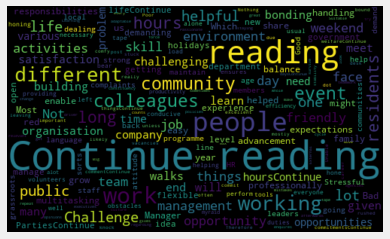

In [11]:
# word cloud visualization
allWords = ' '.join([rvws for rvws in df['Reviews']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
#Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df.head()

,Source,Reviews,Type,Rating,Subjectivity,Polarity,Analysis
0,JobStreet,The company ensures that everyone has a conduc...,GR,5.0,0.500,0.000,Neutral
1,JobStreet,Challenges are the usual 'red tape' obstacles....,CR,5.0,0.125,-0.125,Negative
2,JobStreet,The company has helped me to grow professional...,GR,4.0,1.000,0.500,Positive
3,JobStreet,The company has helped me to grow professional...,CR,4.0,0.100,0.100,Positive
4,JobStreet,Learn alot of thingsContinue reading,GR,5.0,0.000,0.000,Neutral


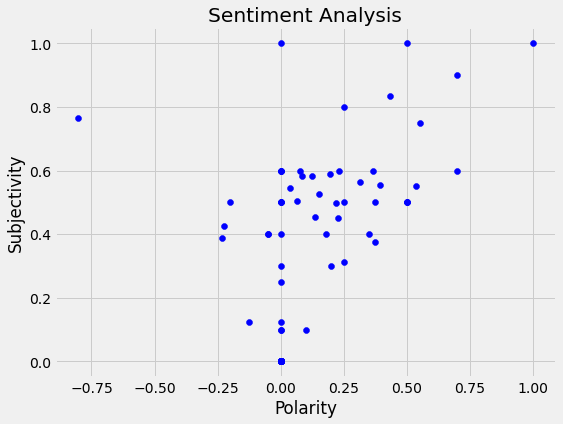

In [13]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [14]:
# Print the percentage of positive tweets
previews = df[df.Analysis == 'Positive']
previews = previews['Reviews']
previews
round( (previews.shape[0] / df.shape[0]) * 100 , 1)


45.8

In [15]:
# Print the percentage of negative tweets
nreviews = df[df.Analysis == 'Negative']
nreviews = nreviews['Reviews']
nreviews

round( (nreviews.shape[0] / df.shape[0]) * 100, 1)

9.7

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Positive    33
Neutral     32
Negative     7
Name: Analysis, dtype: int64

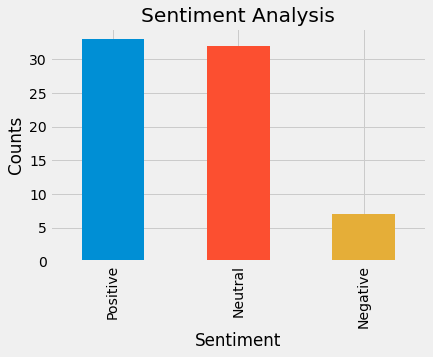

In [17]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [19]:
import dataiku
from dataiku import pandasutils as pdu

In [20]:
py_recipe_output = dataiku.Dataset("JobReviews_SA")
py_recipe_output.write_with_schema(df)

Exception: None: b'dataset does not exist: PASENTIMENTANALYSIS.JobReviews_SA'